# Data processing and dataset creation

In [108]:
import numpy as np
import pandas as pd
import datetime as dt
import tarfile
import os
import matplotlib.pyplot as plt

### Character metadata

In [109]:
header = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date', 'Character name', 'Actor date of birth', "Actor gender","Actor height","Actor ethnicity","Actor name","Actor age at movie release","Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"]

df_characters = pd.read_csv('../../../MovieSummaries/character.metadata.tsv', delimiter='\t', encoding='utf-8', header=None, names=header)
# clean up the data
df_characters['Actor date of birth'] = pd.to_datetime(df_characters['Actor date of birth'], errors='coerce')
df_characters['Movie release date'] = pd.to_datetime(df_characters['Movie release date'], errors='coerce')
df_characters.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26 00:00:00,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15 00:00:00,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15 00:00:00,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12 00:00:00,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25 00:00:00,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


### Movies Metadata

In [110]:
# We define the functions used to cluster the genres, extract one main language and one main country, and cluster the countries by continent

def extract_main_language(string):
    dic = eval(string)
    #extract values of the dic
    values = dic.values()
    if len(values) == 0:
        return np.nan
    if len(values) == 1:
        return list(values)[0]
    else:
        return "Multilingual"

    
def extract_main_genre(genres):
    dic = eval(genres)
    #extract values of the dic
    values = dic.values()
    if len(values) == 0:
        return np.nan
    if len(values) == 1:
        return list(values)[0]
    else:
        return list(values)
    
def extrat_top_ten_genres(genre_list):
    top_films = ['Thriller', 'Drama', 'Crime', 'Short Film', 'Romance', 'Comedy', 'Action/Adventure', 'Horror', 'Science Fiction', 'Musical', 'Action','Family Film']
    try: 
        for genre in genre_list:
            if genre in top_films:
                return genre
        return 'Other'
    except:
        return np.nan
        
def keeping_most_common_genre(genre):

    ## This function does not work on the column of genres
    # Mapping of genres according to the 10 main categories
    genre_mapping = {
        "Thriller": ["Thriller"],
        "Drama": ["Drama", "Family Drama", "Melodrama", "Costume drama", "Tragedy"],
        "Crime": ["Crime Fiction"],
        "Short Film": ["Short Film"],
        "Romance": ["Romantic comedy", "Romance Film"],
        "Comedy": ["Comedy", "Parody", "Comedy film", "Comedy of Errors"],
        "Action/Adventure": ["Action/Adventure", "Action", "Adventure", "War film", "Swashbuckler films", "Martial Arts Film"],
        "Horror": ["Horror", "Monster movie", "Zombie Film", "Natural horror films"],
        "Science Fiction": ["Science Fiction", "Fantasy Adventure"],
        "Musical": ["Musical", "Music"]
    }

    for key, value in genre_mapping.items():
        if genre in value:
            return key
    return np.nan

def map_country_to_continent(country):
    dic = eval(country)
    values = dic.values()
    if len(values) == 0:
        return np.nan
    if len(values) == 1:
        country = list(values)[0]
    
    
    usa = ["United States of America"]

    europe = ["Albania", "Armenia", "Austria", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Crime", "Croatia",
    "Cyprus", "Czech Republic", "Czechoslovakia", "Denmark", "England", "Estonia", "Federal Republic of Yugoslavia", 
    "Finland", "France", "Georgia", "Georgian SSR", "German Democratic Republic", "Germany", "Greece", "Hungary",
    "Iceland", "Ireland", "Isle of Man", "Italy", "Kingdom of Great Britain", "Lithuania", "Luxembourg", "Malta",
    "Nazi Germany", "Netherlands", "Northern Ireland", "Norway", "Poland", "Portugal", "Republic of Macedonia",
    "Romania", "Scotland", "Serbia", "Serbia and Montenegro", "Slovakia", "Slovenia", "Socialist Federal Republic of Yugoslavia",
    "Soviet occupation zone", "Spain", "Sweden", "Switzerland", "Ukraine", "Ukrainian SSR", "Ukranian SSR", "United Kingdom",
    "Wales", "Weimar Republic", "West Germany", "Yugoslavia"]

    asia = ["Afghanistan", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Burma", "Cambodia", "China", "Hong Kong",
    "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Korea", "Kuwait", "Lebanon", "Malayalam Language", 
    "Malaysia", "Mandatory Palestine", "Mongolia", "Nepal", "Pakistan", "Palestinian territories", "Philippines", 
    "Qatar", "Russia", "Singapore", "South Korea", "Soviet Union", "Sri Lanka", "Taiwan", "Thailand", "Turkmenistan",
    "United Arab Emirates", "Uzbek SSR", "Uzbekistan", "Vietnam"]

    africa = ["Algeria", "Burkina Faso", "Cameroon", "Democratic Republic of the Congo", "Egypt", "Ethiopia", "Guinea-Bissau",
    "Kenya", "Mali", "Morocco", "Nigeria", "Senegal", "South Africa", "Tunisia", "Turkey", "Zambia", "Zimbabwe"]

    america = ["Argentina", "Bahamas", "Bolivia", "Brazil", "Canada", "Chile", "Colombia", "Costa Rica", "Cuba",
    "Jamaica", "Mexico", "Peru", "Puerto Rico", "Uruguay", "Venezuela"]

    oceania = ["Australia", "New Zealand"]
    try:
        if country in africa:
            return "Africa"
        elif country in europe:
            return "Europe"
        elif country in asia:
            return "Asia"
        elif country in america:
            return "America"
        elif country in oceania:
            return "Oceania"
        elif country in usa:
            return "USA"
        else:
            return np.nan
    except:
        return np.nan


    
def extract_main_country(countries):
    # Function to extract the main country
    try:
        return countries.split(':')[1].split(',')[0].replace('"',"").replace("}","")
    except:
        return np.nan
        




In [111]:
header = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres']
df_movie = pd.read_csv('../../../MovieSummaries/movie.metadata.tsv', delimiter='\t', encoding='utf-8', header=None, names=header)

# We apply the functions to the columns, clustering the genres into 10 main genres and extracting the main country, language, and clustering
# the countries into continents for our geographical analysis

df_movie["Main genre"] = df_movie["Movie genres"].apply(extract_main_genre)
df_movie["Main language"] = df_movie['Movie languages'].apply(extract_main_language)
df_movie['Top genres'] = df_movie['Main genre'].apply(extrat_top_ten_genres)
df_movie["Main country"] = df_movie['Movie countries'].apply(extract_main_country)
df_movie["Main continent"] = df_movie['Movie countries'].apply(map_country_to_continent)

#df_movie['Main genre'].unique()
df_movie.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Main genre,Main language,Top genres,Main country,Main continent
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","[Thriller, Science Fiction, Horror, Adventure,...",English Language,Thriller,United States of America,USA
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...","[Mystery, Biographical film, Drama, Crime Drama]",English Language,Drama,United States of America,USA
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama]",Norwegian Language,Drama,Norway,Europe
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...","[Thriller, Erotic thriller, Psychological thri...",English Language,Thriller,United Kingdom,Europe
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",Drama,German Language,Other,Germany,Europe


### Cleaning textual data

In [112]:
# Function used to clean the textual data, removing punctuation, stopwords, and lemmatizing the words

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def clean_text(text):
    """
    Cleans the text by removing punctuation, stopwords, and lemmatizing the words.
    """
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # remove stopwords
    text = [word for word in text.split() if word not in stopwords.words('english')]
    # lemmatize words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(text)

[nltk_data] Downloading package stopwords to /Users/mathi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mathi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mathi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [113]:
# We import the plot summaries and clean them using the defined function

with open ('../../../MovieSummaries/plot_summaries.txt', 'r') as f:
    plot_summaries = f.readlines()

# keep the ID of the movie and the summary
plot_ids = [plot_summary.split('\t')[0] for plot_summary in plot_summaries]
plot_summaries = [plot_summary.split('\t')[1] for plot_summary in plot_summaries]

#clean the text
#plot_summaries_clean = [clean_text(plot_summary) for plot_summary in plot_summaries]
print(plot_summaries[0])
clean_text(plot_summaries[0])

Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.



'Shlykov hardworking taxi driver Lyosha saxophonist develop bizarre lovehate relationship despite prejudice realize arent different'

In [114]:
# Merge the cleaned summaries with the movies metadata dataframe

df_plot_summaries = pd.DataFrame({'Wikipedia movie ID': plot_ids, 'Plot summary': plot_summaries})
df_plot_summaries.head()

df_plot_summaries['Wikipedia movie ID'] = df_plot_summaries['Wikipedia movie ID'].astype(int)
df_movie['Wikipedia movie ID'] = df_movie['Wikipedia movie ID'].astype(int)

df_movie2 = df_movie.merge(df_plot_summaries, on='Wikipedia movie ID')

## Completing the dataset with the IMDb non-commercial dataset

In [115]:
# We get the IMDb ratings from the IMDb non-commercial dataset

df_ratings = pd.read_csv('../../../IMDb dataset/ratings.tsv', delimiter='\t', encoding='utf-8')

In [116]:
# We import the IMDb title_basics df, which contains data about the movie titles
df_IMDb_movies = pd.read_csv('../../../IMDb dataset/title_basics.tsv', delimiter='\t', encoding='utf-8')


/var/folders/qd/996x_2t932b4mbltb5bx_y9r0000gn/T/ipykernel_9833/1672550605.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_IMDb_movies = pd.read_csv('../../../IMDb dataset/title_basics.tsv', delimiter='\t', encoding='utf-8')


In [117]:
# We merge the two dataframes to add the IMDb ratings to our movies metadata dataframe

df_IMDb_movies2 = df_IMDb_movies.merge(df_ratings, on = 'tconst', how = 'left').reset_index(drop = True)

### Data cleaning

In [118]:
# We clean the data, keeping only movies after 1920, keeping only movies and short, and keeping only movies with ratings
df_IMDb_movies2["startYear"] = pd.to_numeric(df_IMDb_movies2["startYear"], errors='coerce') # convert the year to numeric
df_IMDb_movies2 = df_IMDb_movies2[df_IMDb_movies2['startYear'] > 1920] # keeping only movies after 1920
df_IMDb_movies2 = df_IMDb_movies2[df_IMDb_movies2['titleType'].isin(['movie', 'short'])] # keep only movies and short
df_IMDb_movies2 = df_IMDb_movies2[~df_IMDb_movies2['averageRating'].isna()].reset_index(drop = True) # keep only movies with ratings: passes from 13M movies to 400k movies

In [119]:
# We set the titles to lower case to optimize the merging with the other datasets

df_IMDb_movies2["primaryTitle_lower"] = df_IMDb_movies2["primaryTitle"].str.lower()
df_IMDb_movies2["originalTitle_lower"] = df_IMDb_movies2["originalTitle"].str.lower()

### Merging with df_movie

In [120]:
# We clean the release date to keep only the year

def clean_release_date(date):
    try:
        return int(date[0:4])
    except:
        return np.nan   
    
df_movie2['Release Date'] = df_movie2['Movie release date'].apply(clean_release_date)
df_movie2['title_lower'] = df_movie2['Movie name'].str.lower()

In [121]:
# Merge the DataFrames based on name and date
df_movie3 = df_movie2.merge(df_IMDb_movies2, left_on=['title_lower', 'Release Date'], right_on=['primaryTitle_lower', 'startYear'], how='left')

# Reset the index
df_movie3 = df_movie3.reset_index(drop=True)

In [122]:
# proportion of movies with IMDb ratings
df_movie3[~df_movie3['tconst'].isna()].shape[0] / df_movie3.shape[0]*100 

63.169104739613815

In [123]:
# We only keep the columns we are interested in and filter out the others 

df_movies_columns_keep = ['Movie name', 'Movie box office revenue', 'Movie runtime', 'Movie genres', 'Main genre',
       'Main language', 'Top genres', 'Main country', 'Main continent',
       'Plot summary', 'Release Date', 'tconst', 'averageRating', 'numVotes']

df_movies = df_movie3[df_movies_columns_keep]
df_movies

,Movie name,Movie box office revenue,Movie runtime,Movie genres,Main genre,Main language,Top genres,Main country,Main continent,Plot summary,Release Date,tconst,averageRating,numVotes
0,Ghosts of Mars,14010832.0,98.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","[Thriller, Science Fiction, Horror, Adventure,...",English Language,Thriller,United States of America,USA,"Set in the second half of the 22nd century, th...",2001.0,tt0228333,4.9,56894.0
1,White Of The Eye,NaN,110.0,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...","[Thriller, Erotic thriller, Psychological thri...",English Language,Thriller,United Kingdom,Europe,A series of murders of rich young women throug...,1987.0,tt0094320,6.1,2894.0
2,A Woman in Flames,NaN,106.0,"{""/m/07s9rl0"": ""Drama""}",Drama,German Language,Other,Germany,Europe,"Eva, an upper class housewife, becomes frustra...",1983.0,tt0083949,5.9,623.0
3,The Sorcerer's Apprentice,NaN,86.0,"{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","[Family Film, Fantasy, Adventure, World cinema]",English Language,Family Film,South Africa,Africa,"Every hundred years, the evil Morgana returns...",2002.0,NaN,NaN,NaN
4,Little city,NaN,93.0,"{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","[Romantic comedy, Ensemble Film, Comedy-drama,...",English Language,Drama,United States of America,USA,"Adam, a San Francisco-based artist who works a...",1997.0,tt0119548,5.8,1129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42720,The Ghost Train,NaN,82.0,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...","[Crime Fiction, Thriller, Comedy, Supernatural]",English Language,Thriller,United Kingdom,Europe,{{plot}} The film opens with a Great Western e...,1941.0,tt0033660,6.2,1582.0
42721,Mermaids: The Body Found,NaN,120.0,"{""/m/07s9rl0"": ""Drama""}",Drama,English Language,Other,United States of America,USA,Two former National Oceanic Atmospheric Admini...,2011.0,NaN,NaN,NaN
42722,Knuckle,NaN,96.0,"{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...","[Biographical film, Drama, Documentary]",English Language,Drama,Ireland,NaN,{{No plot}} This film follows 12 years in the ...,2011.0,tt1606259,6.8,3193.0
42723,The Super Dimension Fortress Macross II: Lover...,NaN,150.0,"{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...","[Science Fiction, Japanese Movies, Adventure, ...",Japanese Language,Science Fiction,Japan,Asia,"The story takes place in the year 2092,The Sup...",1992.0,NaN,NaN,NaN


## Adding budget data

In [124]:
# We get the movie budget data from the TMDB dataset as we do not have it and need it to compute the net profit of a movie

with open('../../../movie_data_tmdb.csv', 'r') as file:
    lines = file.readlines()

# Split each line using the '|' character as the delimiter
data = [line.strip().split('|') for line in lines]

# Create a DataFrame from the split data
df = pd.DataFrame(data)
df.rename(columns={0: 'adult', 1: 'title', 2: 'release_date', 3: 'budget', 4: 'revenue', 5: 'runtime', 6: 'genres', 7: 'IMDb', 8: 'vote_count'}, inplace=True)
df = df[['budget', 'IMDb']]
df

,budget,IMDb
0,budget,imdb_id
1,0,tt0055827
2,0,tt0055910
3,0,tt0056195
4,0,tt0072962
...,...,...
120124,17500,tt7266820
120125,50000,
120126,11000,tt8710832
120127,0,tt11702678


In [125]:
# We merge the two dfs to add the movie budget to our main dataframe

merged = df_movies.merge(df, left_on='tconst', right_on= 'IMDb', how='left').drop_duplicates(subset=['Movie name', 'Release Date'], keep='first').reset_index(drop=True)

In [126]:
display(merged.head())


,Movie name,Movie box office revenue,Movie runtime,Movie genres,Main genre,Main language,Top genres,Main country,Main continent,Plot summary,Release Date,tconst,averageRating,numVotes,budget,IMDb
0,Ghosts of Mars,14010832.0,98.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","[Thriller, Science Fiction, Horror, Adventure,...",English Language,Thriller,United States of America,USA,"Set in the second half of the 22nd century, th...",2001.0,tt0228333,4.9,56894.0,28000000,tt0228333
1,White Of The Eye,NaN,110.0,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...","[Thriller, Erotic thriller, Psychological thri...",English Language,Thriller,United Kingdom,Europe,A series of murders of rich young women throug...,1987.0,tt0094320,6.1,2894.0,0,tt0094320
2,A Woman in Flames,NaN,106.0,"{""/m/07s9rl0"": ""Drama""}",Drama,German Language,Other,Germany,Europe,"Eva, an upper class housewife, becomes frustra...",1983.0,tt0083949,5.9,623.0,0,tt0083949
3,The Sorcerer's Apprentice,NaN,86.0,"{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","[Family Film, Fantasy, Adventure, World cinema]",English Language,Family Film,South Africa,Africa,"Every hundred years, the evil Morgana returns...",2002.0,NaN,NaN,NaN,None,None
4,Little city,NaN,93.0,"{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","[Romantic comedy, Ensemble Film, Comedy-drama,...",English Language,Drama,United States of America,USA,"Adam, a San Francisco-based artist who works a...",1997.0,tt0119548,5.8,1129.0,0,tt0119548


## Adding Oscars wins and nominations

In [127]:
# We load the dataset of the Oscar nominations and awards counts for each movie

oscars = pd.read_csv('../datasets/oscar.csv')
oscars = oscars[['Film', 'Year', 'Award', 'Nomination']]
oscars = oscars[(oscars['Year'] <= 2014) & (oscars['Year'] != 21)] # 21 is a typo and our metadata dataset stops in 2014
display(oscars.head())

,Film,Year,Award,Nomination
121,Birdman or (The Unexpected Virtue of Ignorance),2014,4,9
122,The Grand Budapest Hotel,2014,4,9
123,Whiplash,2014,3,5
124,The Imitation Game,2014,1,8
125,American Sniper,2014,1,6


In [128]:
# We add the oscars data to our main dataframe by merging left on name and release date, and clean the NaN values by replacing them by 0s
# We also rename the columns to be more explicit

merged2 = merged.merge(oscars, left_on=['Movie name', 'Release Date'], right_on= ['Film', 'Year'], how='left').drop(['Film', 'Year'], axis=1)
merged2['Award'].fillna(0, inplace=True)
merged2['Award'] = merged2['Award'].astype(int)
merged2['Nomination'].fillna(0, inplace=True)
merged2['Nomination'] = merged2['Nomination'].astype(int)
merged2.rename(columns={'Award': 'Oscar Wins', 'Nomination': 'Nominations', 'budget' : 'Estimated Budget'}, inplace=True)


## Adding inflation adjusted profit data

In [129]:
# We load the dataset to get the US CPI, needed to compute the budget and revenue in 2014 dollars

df = pd.read_csv('../datasets/US CPI.csv')

In [130]:
display(df.head())

,Yearmon,CPI
0,01-01-1913,9.8
1,01-02-1913,9.8
2,01-03-1913,9.8
3,01-04-1913,9.8
4,01-05-1913,9.7


In [131]:
# We have the CPI per month but want it per year, thus we need to be able to apply a group by year
# and need the first column to only contain the year

df['Yearmon'] = df['Yearmon'].astype(str)

mask = df['Yearmon'].str.contains('|'.join(map(str, range(1913, 2024))))

df.loc[mask, 'Yearmon'] = df.loc[mask, 'Yearmon'].str.extract(f'({"|".join(map(str, range(1913, 2024)))})')[0]

In [132]:
display(df.head())

,Yearmon,CPI
0,1913,9.8
1,1913,9.8
2,1913,9.8
3,1913,9.8
4,1913,9.7


In [133]:
# We get the CPI per year by averaging the CPI over the 12 months

df = df.rename(columns={'Yearmon' : 'Year'})
df = df.groupby('Year')['CPI'].mean().reset_index()
df['Year'] = df['Year'].astype(int)
df = df[df['Year'] <= 2014]


### Computing Inflation rate based on CPI data 

In [134]:
target_year = 2014  # Replace with the desired year

# Get the CPI for the target year
cpi_2014 = df[df['Year'] == target_year]['CPI'].values[0]

# Calculate the inflation rate for each year compared to 2014, IR = (CPI_2014 - CPI) / CPI
df['Inflation Rate'] = (cpi_2014 - df['CPI']) / df['CPI']



In [135]:
display(df)

,Year,CPI,Inflation Rate
0,1913,9.883333,22.953069
1,1914,10.016667,22.634226
2,1915,10.108333,22.419901
3,1916,10.883333,20.752175
4,1917,12.825000,17.458960
...,...,...,...
97,2010,218.055500,0.085669
98,2011,224.939167,0.052445
99,2012,229.593917,0.031108
100,2013,232.957083,0.016222


### Adding the profit inflation adjusted to 2014 value and the inflation rate used for every movie 

In [136]:
# We clean the data and convert the budget and revenue columns to integers to be able to compute a profit and inflation adjusted profit

merged2['Estimated Budget'] = merged2['Estimated Budget'].fillna(0)
merged2['Estimated Budget'] = merged2['Estimated Budget'].astype(int)
merged2['Movie box office revenue'] = merged2['Movie box office revenue'].fillna(0)
merged2['Movie box office revenue'] = merged2['Movie box office revenue'].astype(int)
merged2['Profit'] = merged2['Movie box office revenue'] - merged2['Estimated Budget']
merged2['Release Date'] = merged2['Release Date'].fillna(0).astype(int)


In [137]:
merged2.head()

,Movie name,Movie box office revenue,Movie runtime,Movie genres,Main genre,Main language,Top genres,Main country,Main continent,Plot summary,Release Date,tconst,averageRating,numVotes,Estimated Budget,IMDb,Oscar Wins,Nominations,Profit
0,Ghosts of Mars,14010832,98.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","[Thriller, Science Fiction, Horror, Adventure,...",English Language,Thriller,United States of America,USA,"Set in the second half of the 22nd century, th...",2001,tt0228333,4.9,56894.0,28000000,tt0228333,0,0,-13989168
1,White Of The Eye,0,110.0,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...","[Thriller, Erotic thriller, Psychological thri...",English Language,Thriller,United Kingdom,Europe,A series of murders of rich young women throug...,1987,tt0094320,6.1,2894.0,0,tt0094320,0,0,0
2,A Woman in Flames,0,106.0,"{""/m/07s9rl0"": ""Drama""}",Drama,German Language,Other,Germany,Europe,"Eva, an upper class housewife, becomes frustra...",1983,tt0083949,5.9,623.0,0,tt0083949,0,0,0
3,The Sorcerer's Apprentice,0,86.0,"{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","[Family Film, Fantasy, Adventure, World cinema]",English Language,Family Film,South Africa,Africa,"Every hundred years, the evil Morgana returns...",2002,NaN,NaN,NaN,0,None,0,0,0
4,Little city,0,93.0,"{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","[Romantic comedy, Ensemble Film, Comedy-drama,...",English Language,Drama,United States of America,USA,"Adam, a San Francisco-based artist who works a...",1997,tt0119548,5.8,1129.0,0,tt0119548,0,0,0


In [138]:
# We now have a dataframe with the inflation rate relative to 2014 for each year, allowing us to compute the inflation adjusted budget and revenue

df

,Year,CPI,Inflation Rate
0,1913,9.883333,22.953069
1,1914,10.016667,22.634226
2,1915,10.108333,22.419901
3,1916,10.883333,20.752175
4,1917,12.825000,17.458960
...,...,...,...
97,2010,218.055500,0.085669
98,2011,224.939167,0.052445
99,2012,229.593917,0.031108
100,2013,232.957083,0.016222


In [139]:
# We add the inflation rate and inflation adjusted profit to the dataframe

merged3 = merged2.merge(df, left_on='Release Date', right_on= 'Year', how='left').drop(['Year', 'CPI'], axis=1)
merged3['Inflation adjusted profit'] = merged3['Profit'] * (1 + merged3['Inflation Rate'])
display(merged3.sort_values(by='Inflation adjusted profit', ascending=False).head(10))

,Movie name,Movie box office revenue,Movie runtime,Movie genres,Main genre,Main language,Top genres,Main country,Main continent,Plot summary,...,tconst,averageRating,numVotes,Estimated Budget,IMDb,Oscar Wins,Nominations,Profit,Inflation Rate,Inflation adjusted profit
6247,Snow White and the Seven Dwarfs,416000000,84.0,"{""/m/02l7c8"": ""Romance Film"", ""/m/04t36"": ""Mus...","[Romance Film, Musical, Fantasy, Family Film, ...",English Language,Musical,United States of America,USA,Through a textual prologue told via a storybo...,...,tt0029583,7.6,211082.0,1488423,tt0029583,0,1,414511577,15.459061,6.822472e+09
19556,Gone with the Wind,400000000,234.0,"{""/m/060__y"": ""Film adaptation"", ""/m/04xvh5"": ...","[Film adaptation, Costume drama, Roadshow thea...",English Language,Drama,United States of America,USA,The film opens on a large cotton plantation c...,...,tt0031381,8.2,327988.0,4000000,tt0031381,8,13,396000000,16.021174,6.740385e+09
664,Bambi,267447150,69.0,"{""/m/03k9fj"": ""Adventure"", ""/m/0hj3myq"": ""Chil...","[Adventure, Children's/Family, Animation, Comi...",English Language,Drama,United States of America,USA,"A doe gives birth to a fawn named Bambi, who w...",...,tt0034492,7.3,150961.0,858000,tt0034492,0,0,266589150,13.494051,3.863957e+09
3688,Love with the Proper Stranger,415004880,121.0,"{""/m/06lbpz"": ""Social problem film"", ""/m/01t_v...","[Social problem film, Comedy-drama, Black-and-...",English Language,Drama,United States of America,USA,"The film tells the story of Angie Rossini , a ...",...,tt0057263,7.3,5325.0,8500000,tt0057263,0,0,406504880,6.730161,3.142348e+09
41670,Star Wars Episode IV: A New Hope,775398007,122.0,"{""/m/06n90"": ""Science Fiction"", ""/m/03k9fj"": ""...","[Science Fiction, Adventure, Fantasy, Coming o...",English Language,Science Fiction,United States of America,USA,The film begins with an opening crawl explain...,...,NaN,NaN,NaN,0,None,0,0,775398007,2.906000,3.028705e+09
11509,Titanic,2185372302,194.0,"{""/m/0fx2s"": ""Tragedy"", ""/m/04xvh5"": ""Costume ...","[Tragedy, Costume drama, Historical fiction, A...",Multilingual,Action/Adventure,United States of America,USA,"In 1996, treasure hunter Brock Lovett and his...",...,tt0120338,7.9,1252142.0,200000000,tt0120338,11,14,1985372302,0.474839,2.928104e+09
12257,Avatar,2782275172,178.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","[Thriller, Science Fiction, Adventure, Compute...",Multilingual,Thriller,United States of America,NaN,"By 2154, humans have severely depleted Earth'...",...,tt0499549,7.9,1364377.0,237000000,tt0499549,3,9,2545275172,0.103475,2.808647e+09
12216,The Exorcist,441071011,120.0,"{""/m/0g9psvk"": ""Demonic child"", ""/m/03npn"": ""H...","[Demonic child, Horror, Supernatural, Psycholo...",Multilingual,Horror,United States of America,USA,"At an archaeological dig in Northern Iraq, arc...",...,tt0070047,8.1,443245.0,8000000,tt0070047,2,10,433071011,4.331896,2.309089e+09
22573,The Sound of Music,286214286,172.0,"{""/m/0hj3myq"": ""Children's/Family"", ""/m/0520lz...","[Children's/Family, Roadshow theatrical releas...",English Language,Musical,United States of America,USA,"{{Plot}} Maria is found in a pasture, exultin...",...,tt0059742,8.1,251011.0,8200000,tt0059742,5,10,278014286,6.513446,2.088845e+09
40022,Jaws,470653000,130.0,"{""/m/01jfsb"": ""Thriller""}",Thriller,English Language,Other,United States of America,USA,A girl named Chrissie Watkins leaves an eveni...,...,tt0073195,8.1,644272.0,7000000,tt0073195,3,4,463653000,3.398938,2.039581e+09


In [140]:
# We drop the inflation rate column as we do not need it anymore
merged3 = merged3.drop(columns = 'Inflation Rate', axis=1)


# Directors data (Director dataset + adding director name and id to main dataframe)

In [141]:
# Loading the dataframe containing the crew of each movie to get the directors, we drop the writers column

title_crew = pd.read_csv("../../../IMDb dataset/crew.tsv", sep='\t')
title_crew = title_crew.drop(columns=['writers'])

In [142]:
# Loading the dataset containing the crew names and birth and death years for each director
crew_name = pd.read_csv("../../../IMDb dataset/names.tsv", sep='\t')
crew_name = crew_name.drop(columns=['primaryProfession', 'knownForTitles'])
display(crew_name.head())

,nconst,primaryName,birthYear,deathYear
0,nm0000001,Fred Astaire,1899,1987
1,nm0000002,Lauren Bacall,1924,2014
2,nm0000003,Brigitte Bardot,1934,\N
3,nm0000004,John Belushi,1949,1982
4,nm0000005,Ingmar Bergman,1918,2007


## Creating a dataframe with data for each director

In [143]:
# When a title has multiple directors, we keep the first one
title_crew['directors'] = title_crew['directors'].fillna('')
title_crew['directors'] = title_crew['directors'].apply(lambda x: x.split(','))
title_crew['directors'] = title_crew['directors'].apply(lambda x: x[0])


In [144]:
display(title_crew.head())

,tconst,directors
0,tt0000001,nm0005690
1,tt0000002,nm0721526
2,tt0000003,nm0721526
3,tt0000004,nm0721526
4,tt0000005,nm0005690


In [145]:
# We add the name and birth and death dates to the crew per title dataframe
title_crew2 = title_crew.merge(crew_name, left_on='directors', right_on='nconst', how='left').drop(['directors'], axis=1)
display(title_crew2.head())

,tconst,nconst,primaryName,birthYear,deathYear
0,tt0000001,nm0005690,William K.L. Dickson,1860,1935
1,tt0000002,nm0721526,Émile Reynaud,1844,1918
2,tt0000003,nm0721526,Émile Reynaud,1844,1918
3,tt0000004,nm0721526,Émile Reynaud,1844,1918
4,tt0000005,nm0005690,William K.L. Dickson,1860,1935


In [146]:
# We create a new dataframe where we have for each director its nconst, number of movies directed, the list of the 
# tconst of the directed movies, its birth and death year
director_df = title_crew2.groupby('nconst').agg(
    director_name=('primaryName', 'first'),
    num_movies=('tconst', 'count'),
    movies=('tconst', lambda x: list(x)),
    birth_year=('birthYear', 'first'),
    death_year=('deathYear', 'first')
).reset_index()
display(director_df.head())

,nconst,director_name,num_movies,movies,birth_year,death_year
0,nm0000005,Ingmar Bergman,85,"[tt0038468, tt0038675, tt0039834, tt0040418, t...",1918,2007
1,nm0000008,Marlon Brando,1,[tt0055257],1924,2004
2,nm0000009,Richard Burton,1,[tt0062898],1925,1984
3,nm0000010,James Cagney,1,[tt0050964],1899,1986
4,nm0000018,Kirk Douglas,1,[tt0073559],1916,2020


## Adding the director data to the main dataframe

In [147]:
# We add the director's name and nconst to the main dataframe 

merged4 = merged3.merge(title_crew2[['tconst', 'nconst', 'primaryName']], left_on='tconst', right_on='tconst', how='left')
merged4 = merged4.rename(columns={'primaryName': 'Director name'})
merged4['Director name'].fillna('Unknown', inplace=True)
display(merged4)


,Movie name,Movie box office revenue,Movie runtime,Movie genres,Main genre,Main language,Top genres,Main country,Main continent,Plot summary,...,averageRating,numVotes,Estimated Budget,IMDb,Oscar Wins,Nominations,Profit,Inflation adjusted profit,nconst,Director name
0,Ghosts of Mars,14010832,98.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","[Thriller, Science Fiction, Horror, Adventure,...",English Language,Thriller,United States of America,USA,"Set in the second half of the 22nd century, th...",...,4.9,56894.0,28000000,tt0228333,0,0,-13989168,-1.870336e+07,nm0000118,John Carpenter
1,White Of The Eye,0,110.0,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...","[Thriller, Erotic thriller, Psychological thri...",English Language,Thriller,United Kingdom,Europe,A series of murders of rich young women throug...,...,6.1,2894.0,0,tt0094320,0,0,0,0.000000e+00,nm0131910,Donald Cammell
2,A Woman in Flames,0,106.0,"{""/m/07s9rl0"": ""Drama""}",Drama,German Language,Other,Germany,Europe,"Eva, an upper class housewife, becomes frustra...",...,5.9,623.0,0,tt0083949,0,0,0,0.000000e+00,nm0885554,Robert van Ackeren
3,The Sorcerer's Apprentice,0,86.0,"{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","[Family Film, Fantasy, Adventure, World cinema]",English Language,Family Film,South Africa,Africa,"Every hundred years, the evil Morgana returns...",...,NaN,NaN,0,None,0,0,0,0.000000e+00,NaN,Unknown
4,Little city,0,93.0,"{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","[Romantic comedy, Ensemble Film, Comedy-drama,...",English Language,Drama,United States of America,USA,"Adam, a San Francisco-based artist who works a...",...,5.8,1129.0,0,tt0119548,0,0,0,0.000000e+00,nm0070142,Roberto Benabib
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42150,The Ghost Train,0,82.0,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...","[Crime Fiction, Thriller, Comedy, Supernatural]",English Language,Thriller,United Kingdom,Europe,{{plot}} The film opens with a Great Western e...,...,6.2,1582.0,0,tt0033660,0,0,0,0.000000e+00,nm0285962,Walter Forde
42151,Mermaids: The Body Found,0,120.0,"{""/m/07s9rl0"": ""Drama""}",Drama,English Language,Other,United States of America,USA,Two former National Oceanic Atmospheric Admini...,...,NaN,NaN,0,None,0,0,0,0.000000e+00,NaN,Unknown
42152,Knuckle,0,96.0,"{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...","[Biographical film, Drama, Documentary]",English Language,Drama,Ireland,NaN,{{No plot}} This film follows 12 years in the ...,...,6.8,3193.0,0,tt1606259,0,0,0,0.000000e+00,nm3817974,Ian Palmer
42153,The Super Dimension Fortress Macross II: Lover...,0,150.0,"{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...","[Science Fiction, Japanese Movies, Adventure, ...",Japanese Language,Science Fiction,Japan,Asia,"The story takes place in the year 2092,The Sup...",...,NaN,NaN,0,None,0,0,0,0.000000e+00,NaN,Unknown


# Actors data (Four principal roles for every movie and actor name and age)

In [148]:
# We load the dataset containing the principal members for each movie, filter it to get only the actors and actresses
# and add the name of the actor and actress to it

principal_actors = pd.read_csv("../../../IMDb dataset/title_principals.tsv", sep='\t')
principal_actors = principal_actors[(principal_actors['category'] == 'actor') | (principal_actors['category'] == 'actress')]
principal_actors2 = principal_actors.merge(crew_name, left_on='nconst', right_on='nconst', how='left').drop(columns = ['job'])

In [149]:
# only TV series have more than 4 principal roles so we get rid of them

tconst_with_ordering_ge_5 = principal_actors2.loc[principal_actors2['ordering'] >= 5, 'tconst'].values 
principal_actors2 = principal_actors2[~principal_actors2['tconst'].isin(tconst_with_ordering_ge_5)]


In [150]:
principal_actors2.head(15)

,tconst,ordering,nconst,category,characters,primaryName,birthYear,deathYear
0,tt0000005,1,nm0443482,actor,"[""Blacksmith""]",Charles Kayser,1878,1966
1,tt0000005,2,nm0653042,actor,"[""Assistant""]",John Ott,1850,1931
2,tt0000007,1,nm0179163,actor,\N,James J. Corbett,1866,1933
3,tt0000007,2,nm0183947,actor,\N,Peter Courtney,1867,1896
4,tt0000008,1,nm0653028,actor,"[""Sneezing Man""]",Fred Ott,1860,1936
5,tt0000009,1,nm0063086,actress,"[""Miss Geraldine Holbrook (Miss Jerry)""]",Blanche Bayliss,1878,1951
6,tt0000009,2,nm0183823,actor,"[""Mr. Hamilton""]",William Courtenay,1875,1933
7,tt0000009,3,nm1309758,actor,"[""Chauncey Depew - the Director of the New Yor...",Chauncey Depew,1834,1928
8,tt0000011,1,nm3692297,actor,"[""Acrobats""]",Grunato,\N,\N
9,tt0000014,1,nm0166380,actor,"[""The Gardener""]",François Clerc,\N,\N


In [151]:
print("We have a dataset of {} directors.".format(f"{director_df.shape[0]:,}"))
print("We have a dataset of {} principal roles.".format(f"{principal_actors2.shape[0]:,}"))

We have a dataset of 686,042 directors.
We have a dataset of 12,181,812 principal roles.


# Exporting the data to csv files 

In [152]:
def replace_spaces(df):
    """
    Replaces spaces in column names with underscores.
    
    Args:
    - df (pandas.DataFrame): The DataFrame to modify.
    
    Returns:
    - pandas.DataFrame: The modified DataFrame.
    """
    df.columns = df.columns.str.replace(' ', '_')
    return df

replace_spaces(merged4)

,Movie_name,Movie_box_office_revenue,Movie_runtime,Movie_genres,Main_genre,Main_language,Top_genres,Main_country,Main_continent,Plot_summary,...,averageRating,numVotes,Estimated_Budget,IMDb,Oscar_Wins,Nominations,Profit,Inflation_adjusted_profit,nconst,Director_name
0,Ghosts of Mars,14010832,98.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","[Thriller, Science Fiction, Horror, Adventure,...",English Language,Thriller,United States of America,USA,"Set in the second half of the 22nd century, th...",...,4.9,56894.0,28000000,tt0228333,0,0,-13989168,-1.870336e+07,nm0000118,John Carpenter
1,White Of The Eye,0,110.0,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...","[Thriller, Erotic thriller, Psychological thri...",English Language,Thriller,United Kingdom,Europe,A series of murders of rich young women throug...,...,6.1,2894.0,0,tt0094320,0,0,0,0.000000e+00,nm0131910,Donald Cammell
2,A Woman in Flames,0,106.0,"{""/m/07s9rl0"": ""Drama""}",Drama,German Language,Other,Germany,Europe,"Eva, an upper class housewife, becomes frustra...",...,5.9,623.0,0,tt0083949,0,0,0,0.000000e+00,nm0885554,Robert van Ackeren
3,The Sorcerer's Apprentice,0,86.0,"{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","[Family Film, Fantasy, Adventure, World cinema]",English Language,Family Film,South Africa,Africa,"Every hundred years, the evil Morgana returns...",...,NaN,NaN,0,None,0,0,0,0.000000e+00,NaN,Unknown
4,Little city,0,93.0,"{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","[Romantic comedy, Ensemble Film, Comedy-drama,...",English Language,Drama,United States of America,USA,"Adam, a San Francisco-based artist who works a...",...,5.8,1129.0,0,tt0119548,0,0,0,0.000000e+00,nm0070142,Roberto Benabib
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42150,The Ghost Train,0,82.0,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...","[Crime Fiction, Thriller, Comedy, Supernatural]",English Language,Thriller,United Kingdom,Europe,{{plot}} The film opens with a Great Western e...,...,6.2,1582.0,0,tt0033660,0,0,0,0.000000e+00,nm0285962,Walter Forde
42151,Mermaids: The Body Found,0,120.0,"{""/m/07s9rl0"": ""Drama""}",Drama,English Language,Other,United States of America,USA,Two former National Oceanic Atmospheric Admini...,...,NaN,NaN,0,None,0,0,0,0.000000e+00,NaN,Unknown
42152,Knuckle,0,96.0,"{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...","[Biographical film, Drama, Documentary]",English Language,Drama,Ireland,NaN,{{No plot}} This film follows 12 years in the ...,...,6.8,3193.0,0,tt1606259,0,0,0,0.000000e+00,nm3817974,Ian Palmer
42153,The Super Dimension Fortress Macross II: Lover...,0,150.0,"{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...","[Science Fiction, Japanese Movies, Adventure, ...",Japanese Language,Science Fiction,Japan,Asia,"The story takes place in the year 2092,The Sup...",...,NaN,NaN,0,None,0,0,0,0.000000e+00,NaN,Unknown


In [153]:
# Export the final main dataframe to a CSV file
merged4.to_csv('movies_cleaned_dataset.csv', index=False)

In [154]:
# Export the final director dataframe to a CSV file
director_df.to_csv('directors.csv', index=False)

In [155]:
# Export the final principal actors dataframe to a CSV file
principal_actors2.to_csv('principal_actors.csv', index=False)

# First analysis

This file aims to answers our first sub-questions for Milestone 2 of the project.

We will explore each question, and verify if we can answer them using the data set
We also give summary statistics and correlation matrix.

## 0) Importing the packages and data 

In [ ]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go
sns.set(style="whitegrid")
import math

In [ ]:
df_movie = pd.read_csv('../Datasets/movies_cleaned_dataset.csv')
df_movie.head()

,Movie_name,Movie_box_office_revenue,Movie_runtime,Movie_genres,Main_genre,Main_language,Top_genres,Main_country,Main_continent,Plot_summary,...,averageRating,numVotes,Estimated_Budget,IMDb,Oscar_Wins,Nominations,Profit,Inflation_adjusted_profit,nconst,Director_name
0,Ghosts of Mars,14010832,98.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","['Thriller', 'Science Fiction', 'Horror', 'Adv...",English Language,Thriller,United States of America,USA,"Set in the second half of the 22nd century, th...",...,4.9,56894.0,28000000,tt0228333,0,0,-13989168,-1.870336e+07,nm0000118,John Carpenter
1,White Of The Eye,0,110.0,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...","['Thriller', 'Erotic thriller', 'Psychological...",English Language,Thriller,United Kingdom,Europe,A series of murders of rich young women throug...,...,6.1,2894.0,0,tt0094320,0,0,0,0.000000e+00,nm0131910,Donald Cammell
2,A Woman in Flames,0,106.0,"{""/m/07s9rl0"": ""Drama""}",Drama,German Language,Other,Germany,Europe,"Eva, an upper class housewife, becomes frustra...",...,5.9,623.0,0,tt0083949,0,0,0,0.000000e+00,nm0885554,Robert van Ackeren
3,The Sorcerer's Apprentice,0,86.0,"{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","['Family Film', 'Fantasy', 'Adventure', 'World...",English Language,Family Film,South Africa,Africa,"Every hundred years, the evil Morgana returns...",...,NaN,NaN,0,NaN,0,0,0,0.000000e+00,NaN,Unknown
4,Little city,0,93.0,"{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","['Romantic comedy', 'Ensemble Film', 'Comedy-d...",English Language,Drama,United States of America,USA,"Adam, a San Francisco-based artist who works a...",...,5.8,1129.0,0,tt0119548,0,0,0,0.000000e+00,nm0070142,Roberto Benabib


In [ ]:
## Correlation matrix for numerical variables

num_variables = ['Movie_box_office_revenue','Movie_runtime','Release_Date',	'averageRating',	'numVotes',	'Estimated_Budget',	'Oscar_Wins',	'Nominations',	'Profit',	'Inflation_adjusted_profit']

corr = df_movie[num_variables].corr()
corr.style.background_gradient(cmap='coolwarm').set_caption('Correlation matrix between all samples available ')

,Movie_box_office_revenue,Movie_runtime,Release_Date,averageRating,numVotes,Estimated_Budget,Oscar_Wins,Nominations,Profit,Inflation_adjusted_profit
Movie_box_office_revenue,1.000000,-0.000416,0.049735,0.093973,0.665009,0.687930,0.230265,0.222439,0.970523,0.711144
Movie_runtime,-0.000416,1.000000,0.001474,0.098306,0.128811,-0.000586,0.000004,-0.000000,-0.000308,-0.000281
Release_Date,0.049735,0.001474,1.000000,-0.151772,0.140441,0.064377,0.023069,0.025415,0.038253,0.024023
averageRating,0.093973,0.098306,-0.151772,1.000000,0.203809,0.037717,0.145692,0.158891,0.101650,0.103036
numVotes,0.665009,0.128811,0.140441,0.203809,1.000000,0.540483,0.312498,0.313630,0.622656,0.454448
Estimated_Budget,0.687930,-0.000586,0.064377,0.037717,0.540483,1.000000,0.119756,0.125120,0.492735,0.305012
Oscar_Wins,0.230265,0.000004,0.023069,0.145692,0.312498,0.119756,1.000000,0.867652,0.236313,0.286596
Nominations,0.222439,-0.000000,0.025415,0.158891,0.313630,0.125120,0.867652,1.000000,0.225147,0.270378
Profit,0.970523,-0.000308,0.038253,0.101650,0.622656,0.492735,0.236313,0.225147,1.000000,0.751118
Inflation_adjusted_profit,0.711144,-0.000281,0.024023,0.103036,0.454448,0.305012,0.286596,0.270378,0.751118,1.000000


- We observe that the runtime is not correlated with revenue or profits.
- The number of votes on IMBD is correlated with the revenues.
- Winning an oscar is also highly correlated with the fact of being nominated, which is obvious.
 

In [ ]:
df_movie.describe()

,Movie_box_office_revenue,Movie_runtime,Release_Date,averageRating,numVotes,Estimated_Budget,Oscar_Wins,Nominations,Profit,Inflation_adjusted_profit
count,4.215500e+04,3.554400e+04,42155.000000,26436.000000,2.643600e+04,4.215500e+04,42155.000000,42155.000000,4.215500e+04,3.939200e+04
mean,9.309064e+06,1.285770e+02,1860.930376,6.268028,2.380605e+04,3.230446e+06,0.031693,0.078947,6.078617e+06,1.160929e+07
std,5.334529e+07,5.724356e+03,478.466297,1.095896,9.685211e+04,1.477468e+07,0.326571,0.736461,4.449285e+07,9.156644e+07
min,0.000000e+00,3.000000e-01,0.000000,1.200000,5.000000e+00,0.000000e+00,0.000000,0.000000,-2.250000e+08,-2.739096e+08
25%,0.000000e+00,8.600000e+01,1959.000000,5.700000,3.350000e+02,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,0.000000e+00,9.600000e+01,1990.000000,6.400000,1.483000e+03,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.100000e+02,2005.000000,7.000000,7.910250e+03,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
max,2.782275e+09,1.079281e+06,2014.000000,9.800000,2.816055e+06,3.800000e+08,11.000000,14.000000,2.545275e+09,6.822472e+09


Data completeness:
- Ratings for 26 436 / 42 1555 movies

In [ ]:
# number of IMBD ratings:
df_movie['averageRating'].describe()

count    26436.000000
mean         6.268028
std          1.095896
min          1.200000
25%          5.700000
50%          6.400000
75%          7.000000
max          9.800000
Name: averageRating, dtype: float64

In [ ]:
# Number of movies director
df_movie['Director_name'].describe()
# We 15 760 directors missing

count       42155
unique      10600
top       Unknown
freq        15760
Name: Director_name, dtype: object

In [ ]:
# number of profits different than 0
(df_movie['Inflation_adjusted_profit']>0).describe()

count     42155
unique        2
top       False
freq      35748
Name: Inflation_adjusted_profit, dtype: object

## 1) How do rating and revenue vary as a function of the genre?

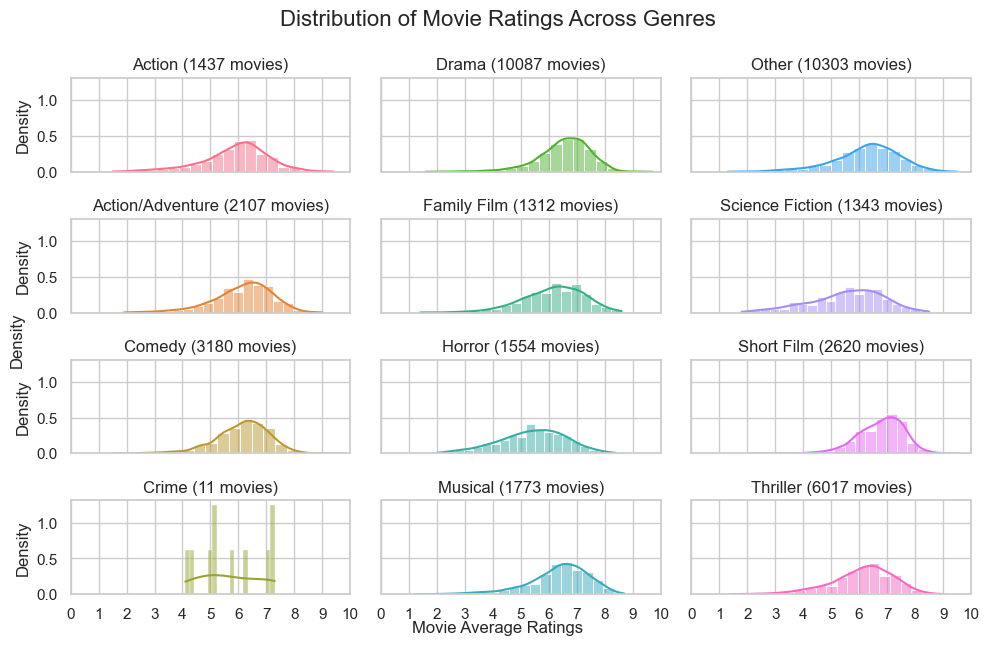

In [ ]:
# Calculate stats by genre 
stats_by_genre = df_movie.groupby('Top_genres').apply(lambda x: pd.Series({
    'rating': x['averageRating'].values,
    'num_movies': len(x)
}))

# Create subplots with Seaborn for better aesthetics
fig, ax = plt.subplots(4, 3, figsize=(10, 6), sharey=True, sharex=True)

# Define a color palette for each genre
palette = sns.color_palette("husl", n_colors=len(stats_by_genre))

for i, (genre, data) in enumerate(stats_by_genre.iterrows()):
    sbplt = ax[i % 4, math.floor(i / 4)]
    
    # Histogram with normalization by the number of movies and different colors for each genre
    sns.histplot(data['rating'], bins=20, kde=True, ax=sbplt, stat='density', color=palette[i]) #Use density instead of count
    
    sbplt.set_title(f'{genre} ({data["num_movies"]} movies)')
    sbplt.set_xlim(0, 10)  # Set x-axis limits
    
    # Add x-axis values on all scores
    x_ticks = [tick for tick in range(11)]
    sbplt.set_xticks(x_ticks)

fig.tight_layout()

# Set overall labels
fig.text(0.5, 0.02, "Movie Average Ratings", ha='center', va='center')
fig.text(0.02, 0.5, "Density", ha='center', va='center', rotation='vertical')
# Add a title to the figure
fig.suptitle("Distribution of Movie Ratings Across Genres", fontsize=16,y=1.05)

plt.show()


We can observe that the movie ratings by genre are gaussian.   

In [ ]:
df_movie.groupby('Top_genres')['averageRating'].describe()

,count,mean,std,min,25%,50%,75%,max
Top_genres,,,,,,,,
Action,887.0,5.911161,1.172426,1.5,5.300,6.1,6.600,9.4
Action/Adventure,1586.0,6.154918,1.047884,1.9,5.600,6.3,6.900,9.0
Comedy,2363.0,6.131443,0.955446,1.5,5.600,6.2,6.800,9.8
Crime,10.0,5.730000,1.185139,4.1,5.025,5.5,6.875,7.3
Drama,6986.0,6.550329,0.934573,1.6,6.100,6.7,7.200,9.7
Family Film,680.0,6.164559,1.097618,1.4,5.500,6.3,7.000,8.6
Horror,899.0,5.419244,1.177677,2.0,4.650,5.5,6.250,8.4
Musical,1315.0,6.360304,1.083777,1.2,5.800,6.5,7.100,8.7
Other,4889.0,6.269523,1.169043,1.3,5.600,6.4,7.100,9.5


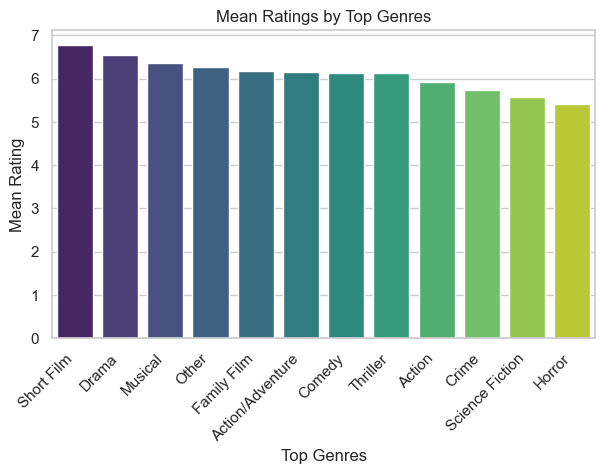

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_movie is your DataFrame and 'Top_genres' is a column in it

# Use seaborn for better style
sns.set(style="whitegrid")

# Group by 'Top_genres' and calculate the mean of 'averageRating'
mean_ratings = df_movie.groupby('Top_genres')['averageRating'].mean().reset_index()

# Plotting with Seaborn
plt.figure(figsize=(7, 4))
sns.barplot(x='Top_genres', y='averageRating', data=mean_ratings, order=mean_ratings.sort_values('averageRating', ascending=False)['Top_genres'], palette='viridis')

# Set plot labels and title
plt.title('Mean Ratings by Top Genres')
plt.xlabel('Top Genres')
plt.ylabel('Mean Rating')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


We observe that short films have the highest mean ratings, and that horror have the least ratings.

## 2) Which relation between the screen time and the opportunity to win an award ?

We first consider all the movies who were nominated at the Oscar ceremony : we have 674 nominated movies. Several movies can be nominated, and there exist several categories of Oscar awards.

- The average screan time is 121 minutes. 
- We also observe that the mean release year is 1974.

In [ ]:
# deleting extreme outliers for movie runtime
df_movie = df_movie[df_movie['Movie_runtime'] < 300] # 300 minutes is 5 hours

Ploting summary statistics for movies that have been nominated for an Oscar:

We have 695 movies that have been nominated.

In [ ]:
# 
df_movie[df_movie['Nominations'] != 0].describe()

,Movie_box_office_revenue,Movie_runtime,Release_Date,averageRating,numVotes,Estimated_Budget,Oscar_Wins,Nominations,Profit,Inflation_adjusted_profit
count,6.950000e+02,695.000000,695.000000,676.000000,6.760000e+02,6.950000e+02,695.000000,695.000000,6.950000e+02,6.950000e+02
mean,9.335208e+07,116.831799,1974.099281,7.406065,1.830885e+05,1.683873e+07,1.884892,4.716547,7.651335e+07,1.750133e+08
std,2.113991e+08,34.121362,23.102395,0.612106,3.531700e+05,3.560136e+07,1.695388,3.251504,1.876706e+08,4.743071e+08
min,0.000000e+00,5.000000,1934.000000,5.100000,8.500000e+01,0.000000e+00,0.000000,1.000000,-2.000000e+08,-2.348670e+08
25%,0.000000e+00,102.000000,1953.500000,7.000000,9.050000e+03,0.000000e+00,1.000000,2.000000,0.000000e+00,0.000000e+00
50%,1.304646e+07,116.000000,1975.000000,7.500000,4.029300e+04,2.000000e+06,1.000000,4.000000,8.350205e+06,4.317011e+07
75%,8.927260e+07,130.000000,1994.000000,7.800000,1.885272e+05,1.500000e+07,2.000000,7.000000,6.797294e+07,1.835972e+08
max,2.782275e+09,250.000000,2012.000000,9.200000,2.797575e+06,2.370000e+08,11.000000,14.000000,2.545275e+09,6.822472e+09


We can also vizualise the number of awarded movies compared to the runtime

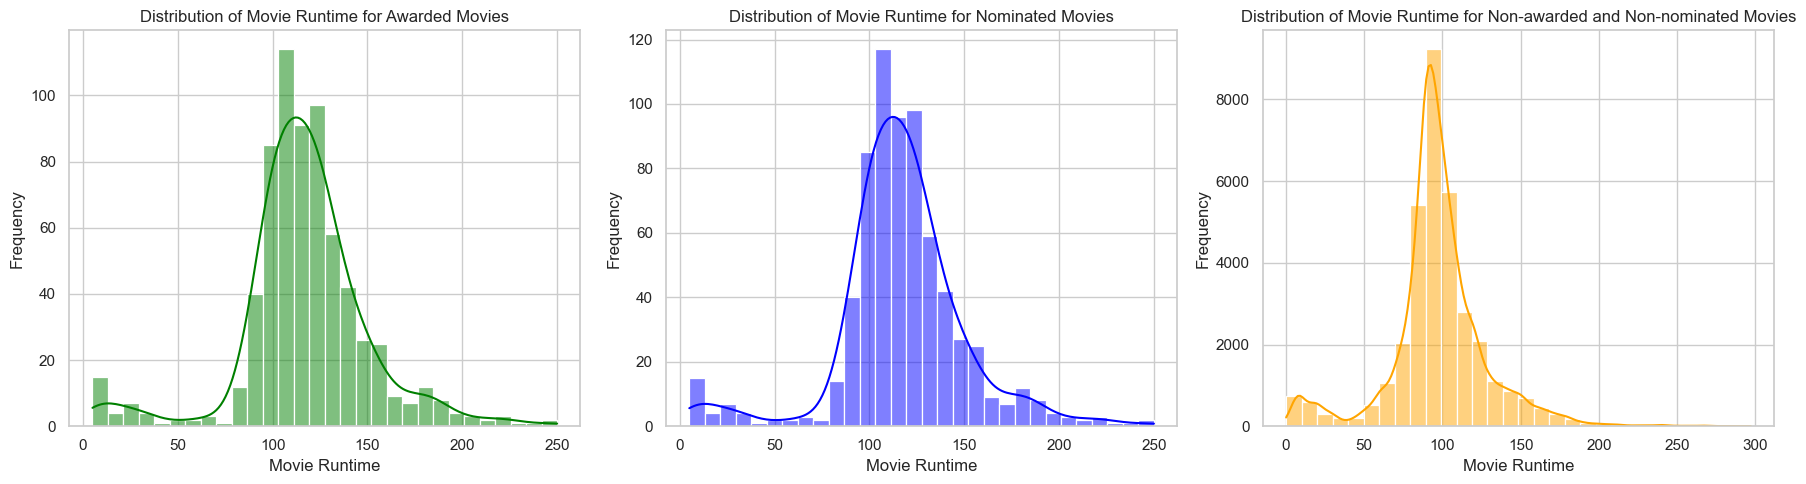

In [ ]:
df_movie['Was_nominated'] = df_movie['Nominations'].apply(lambda x: 'Nominated' if x > 0 else 'Not Nominated')
df_movie['Was_awarded'] = df_movie['Oscar_Wins'].apply(lambda x: 'Awarded' if x > 0 else 'Not Awarded')

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot for Awarded Movies
sns.histplot(data=df_movie[df_movie['Was_awarded'] == 'Awarded'], x='Movie_runtime', bins=30, kde=True, color='green', ax=axes[0])
axes[0].set_title('Distribution of Movie Runtime for Awarded Movies')
axes[0].set_xlabel('Movie Runtime')
axes[0].set_ylabel('Frequency')

# Plot for Nominated Movies
sns.histplot(data=df_movie[df_movie['Was_nominated'] == 'Nominated'], x='Movie_runtime', bins=30, kde=True, color='blue', ax=axes[1])
axes[1].set_title('Distribution of Movie Runtime for Nominated Movies')
axes[1].set_xlabel('Movie Runtime')
axes[1].set_ylabel('Frequency')

# Plot for Non-nominated and Non-awarded Movies
non_awarded_nominated_movies = df_movie[(df_movie['Was_awarded'] == 'Not Awarded') & (df_movie['Was_nominated'] == 'Not Nominated')]
sns.histplot(data=non_awarded_nominated_movies, x='Movie_runtime', bins=30, kde=True, color='orange', ax=axes[2])
axes[2].set_title('Distribution of Movie Runtime for Non-awarded and Non-nominated Movies')
axes[2].set_xlabel('Movie Runtime')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


We can observe that non-nominated and non-awarded movies seem to be shorter. We should test this with a statistical test to verify if its significant.

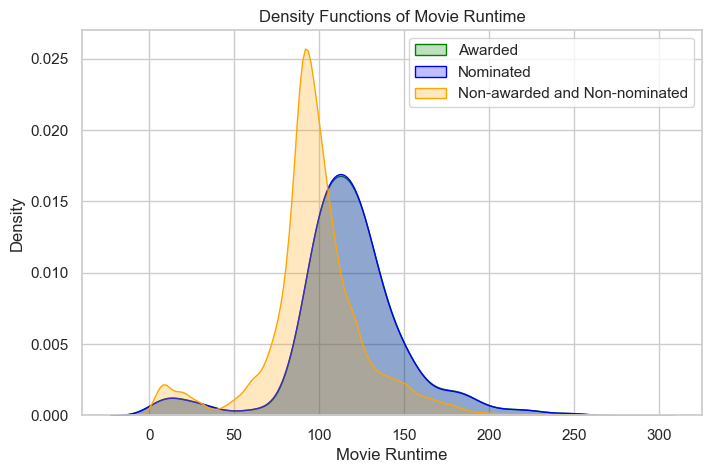

In [ ]:
plt.figure(figsize=(8, 5))
# KDE Plot for Awarded Movies
sns.kdeplot(data=df_movie[df_movie['Was_awarded'] == 'Awarded'], x='Movie_runtime', fill=True, label='Awarded', color='green')
# KDE Plot for Nominated Movies
sns.kdeplot(data=df_movie[df_movie['Was_nominated'] == 'Nominated'], x='Movie_runtime', fill=True, label='Nominated', color='blue')
# KDE Plot for Non-nominated and Non-awarded Movies
non_awarded_nominated_movies = df_movie[(df_movie['Was_awarded'] == 'Not Awarded') & (df_movie['Was_nominated'] == 'Not Nominated')]
sns.kdeplot(data=non_awarded_nominated_movies, x='Movie_runtime', fill=True, label='Non-awarded and Non-nominated', color='orange')

# Set plot title and labels
plt.title('Density Functions of Movie Runtime', fontsize=12)
plt.xlabel('Movie Runtime')
plt.ylabel('Density')
plt.legend()
plt.show()


- Awarded and nominated movies have the same density of movie runtime. 
- The non-awarded and non-nomianted have a smaller mean.
- We could also try to fit a density function: log-normal, normal, student,...

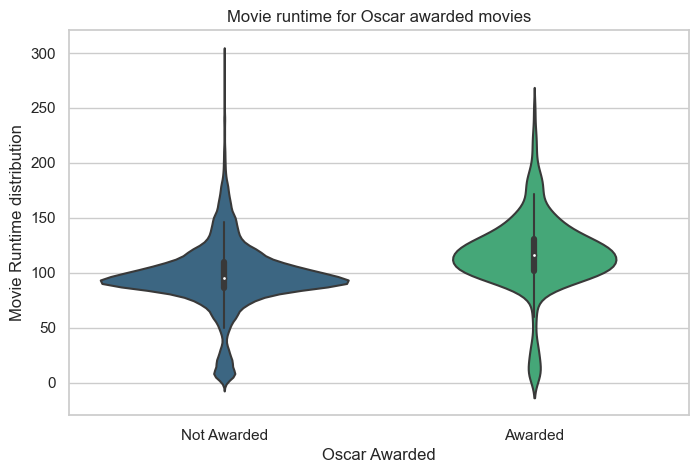

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Was_awarded', y='Movie_runtime', data=df_movie, palette='viridis')
plt.title('Movie runtime for Oscar awarded movies')
plt.ylabel('Movie Runtime distribution')
plt.xlabel('Oscar Awarded')
plt.show()

We can then use a linear regression between the number of nominations and the movie runtime

This driver seems not significant at all: $p_{value} =  0.985$

In [ ]:
mod1 = smf.ols(formula='Nominations ~ Movie_runtime ', data=df_movie)
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:            Nominations   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     472.2
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          5.14e-104
Time:                        17:20:01   Log-Likelihood:                -42030.
No. Observations:               35486   AIC:                         8.406e+04
Df Residuals:                   35484   BIC:                         8.408e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1902      0.014    -13.920

Oscar Awarded movies seem to be quite long : the mean and mediane  are around 120 minutes, which is 2h. 

In [ ]:
df_movie.Movie_runtime.describe()

count    35486.000000
mean        97.360676
std         31.433320
min          0.300000
25%         86.000000
50%         96.000000
75%        110.000000
max        297.000000
Name: Movie_runtime, dtype: float64

## 3) What is the relation between being awarded and revenues

We have box office revenue data for  7502 movies.


/var/folders/rj/x8h6rfd922q9x6c_0kgfk7ch0000gn/T/ipykernel_15021/2672414047.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


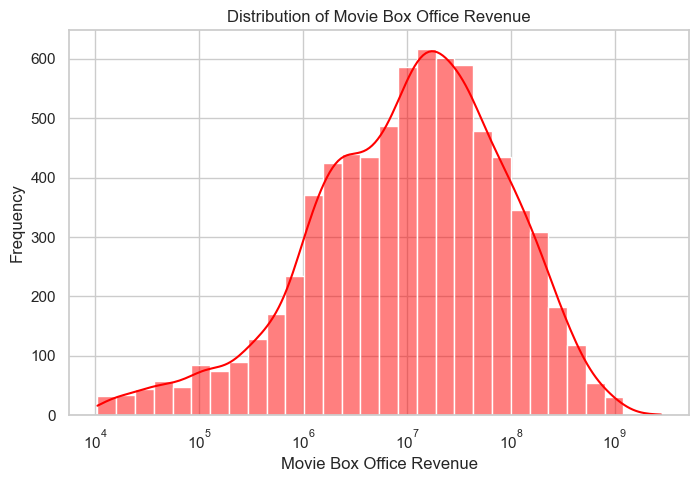

In [ ]:
df_movie_revenues = df_movie[df_movie['Movie_box_office_revenue'] != 0] # We only want movies with box office revenue
print("We have box office revenue data for ",len(df_movie_revenues),"movies.")

plt.figure(figsize=(8, 5))
sns.histplot(data=df_movie_revenues, x='Movie_box_office_revenue', bins=30, kde=True, color='red', log_scale=True)
plt.title('Distribution of Movie Box Office Revenue')
plt.xlabel('Movie Box Office Revenue')
plt.ylabel('Frequency')
fig.show()

The graph is a red-colored histogram with a kernel density estimate curve, showing the distribution of movie box office revenues on a logarithmic scale from \(10^4\) to \(10^9\). The frequency on the y-axis indicates how many movies fall into each revenue range. The distribution is right-skewed, with most movies earning lower revenues and a few earning significantly higher. The title "Distribution of Movie Box Office Revenue" suggests the focus is on how revenue is spread across movies.

We have inflation adjusted data for  6342 movies.


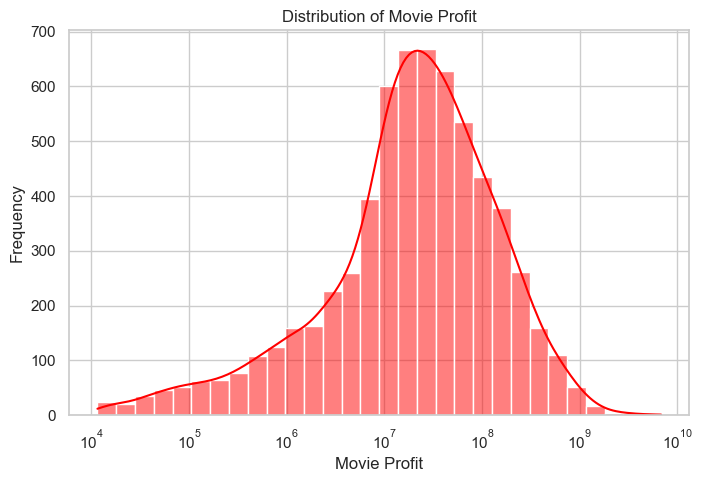

In [ ]:
df_movie_profit = df_movie[df_movie['Inflation_adjusted_profit'] > 10000] # 10000 is the minimum profit
print("We have inflation adjusted data for ",len(df_movie_profit),"movies.")

plt.figure(figsize=(8, 5))
sns.histplot(data=df_movie_profit, x='Inflation_adjusted_profit', bins=30, kde=True, color='red', log_scale=True)
plt.title('Distribution of Movie Profit')
plt.xlabel('Movie Profit')
plt.ylabel('Frequency')
plt.show()

This graph is a red histogram with a kernel density estimate curve, showing the distribution of movie profits on a logarithmic scale from \(10^4\) to \(10^{10}\). The y-axis measures the frequency of movies within each profit range, indicating that most movies have lower profits with fewer high-profit outliers. The distribution appears right-skewed.

/var/folders/rj/x8h6rfd922q9x6c_0kgfk7ch0000gn/T/ipykernel_15021/961978594.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_awarded_nominated_movies = df_movie_profit[(df_movie_profit['Was_awarded'] == 'Not Awarded') & (df_movie['Was_nominated'] == 'Not Nominated')]


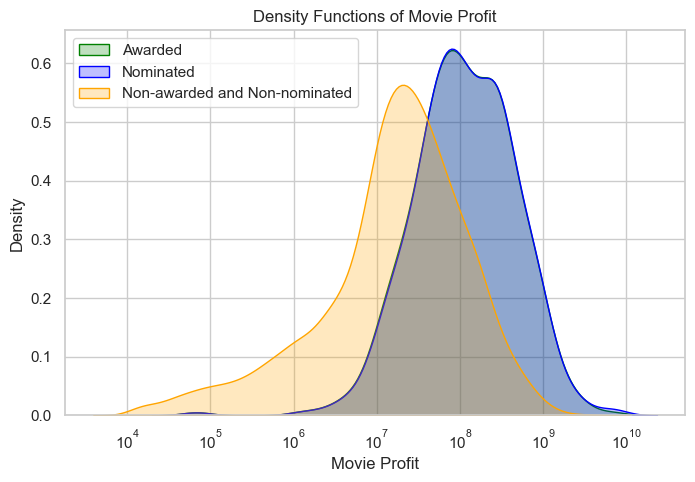

In [ ]:
plt.figure(figsize=(8, 5))
# KDE Plot for Awarded Movies
sns.kdeplot(data=df_movie_profit[df_movie_profit['Was_awarded'] == 'Awarded'], x='Inflation_adjusted_profit', fill=True, label='Awarded', color='green', log_scale=True)
# KDE Plot for Nominated Movies
sns.kdeplot(data=df_movie_profit[df_movie_profit['Was_nominated'] == 'Nominated'], x='Inflation_adjusted_profit', fill=True, label='Nominated', color='blue',log_scale=True)
# KDE Plot for Non-nominated and Non-awarded Movies
non_awarded_nominated_movies = df_movie_profit[(df_movie_profit['Was_awarded'] == 'Not Awarded') & (df_movie['Was_nominated'] == 'Not Nominated')]
sns.kdeplot(data=non_awarded_nominated_movies, x='Inflation_adjusted_profit', fill=True, label='Non-awarded and Non-nominated', color='orange' , log_scale=True)

# Set plot title and labels
plt.title('Density Functions of Movie Profit', fontsize=12)
plt.xlabel('Movie Profit')
plt.ylabel('Density')
plt.legend( loc = 'upper left') 



This graph is a density plot showing the distribution of movie profits on a logarithmic scale from \(10^4\) to \(10^{10}\). There are three categories compared: "Awarded", "Nominated", and "Non-awarded and Non-nominated", each represented by different colors. The density on the y-axis reflects the probability of profits within each category. Notably, the distributions for "Awarded" and "Nominated" movies overlap significantly, suggesting similar profit distributions for these two groups. The "Non-awarded and Non-nominated" category shows a different distribution, peaking at a lower profit range. The title "Density Functions of Movie Profit" indicates the graph is analyzing the probability distributions of profits across these categories.

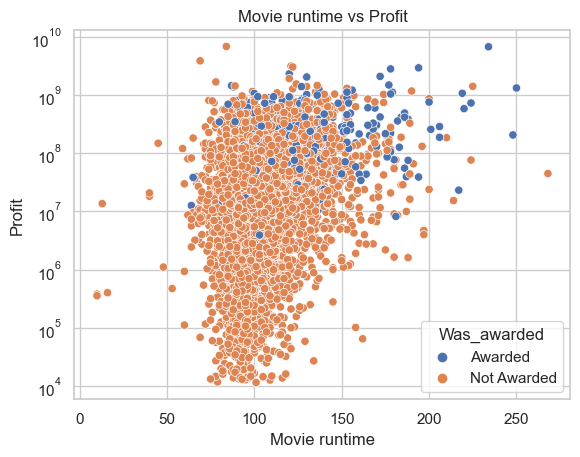

In [ ]:
sns.scatterplot(data=df_movie_profit, x='Movie_runtime', y='Inflation_adjusted_profit', hue='Was_awarded')
plt.title('Movie runtime vs Profit')
plt.xlabel('Movie runtime')
plt.yscale('log') 
plt.ylabel('Profit')
plt.show()

The scatter plot suggests that most movies fall within the typical runtime range of 80 to 150 minutes and cluster at the lower end of the profit scale. Awarded movies are more prevalent at higher profit levels, indicating a potential association between receiving awards and higher profitability, but there's no clear correlation between runtime and profit. The data also shows a higher density of non-awarded movies across all profit ranges.

## 4) What is the relationship between ratings and profit

We can observe that awarded movies have significantly higher profits and movie ratings.

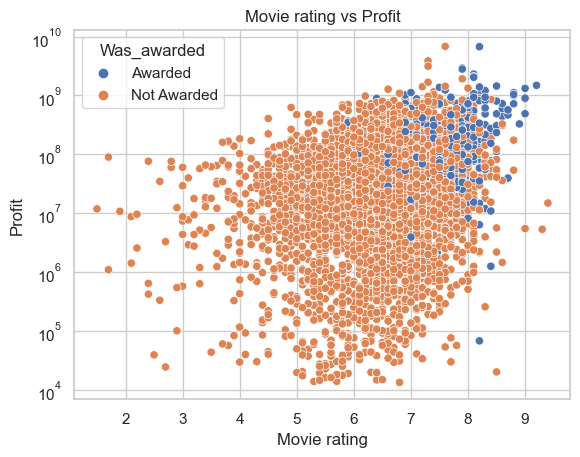

In [ ]:
sns.scatterplot(data=df_movie_profit, x='averageRating', y='Inflation_adjusted_profit', hue='Was_awarded')
plt.title('Movie rating vs Profit')
plt.xlabel('Movie rating')
plt.yscale('log') 
plt.ylabel('Profit')
plt.show()

The scatter plot compares movie ratings to profits, showing that awarded movies tend to cluster towards higher ratings and profits. However, there's a broad spread of non-awarded movies across a range of profits without a clear pattern linking ratings to financial success.

In [ ]:
mod1 = smf.ols(formula='Inflation_adjusted_profit ~ averageRating ', data=df_movie)
res1 = mod1.fit()
print(res1.summary())

                                OLS Regression Results                               
Dep. Variable:     Inflation_adjusted_profit   R-squared:                       0.013
Model:                                   OLS   Adj. R-squared:                  0.013
Method:                        Least Squares   F-statistic:                     301.1
Date:                       Thu, 16 Nov 2023   Prob (F-statistic):           5.05e-67
Time:                               17:20:03   Log-Likelihood:            -4.6585e+05
No. Observations:                      23348   AIC:                         9.317e+05
Df Residuals:                          23346   BIC:                         9.317e+05
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

### 5) What is the linked between continent of realisation and average rating?

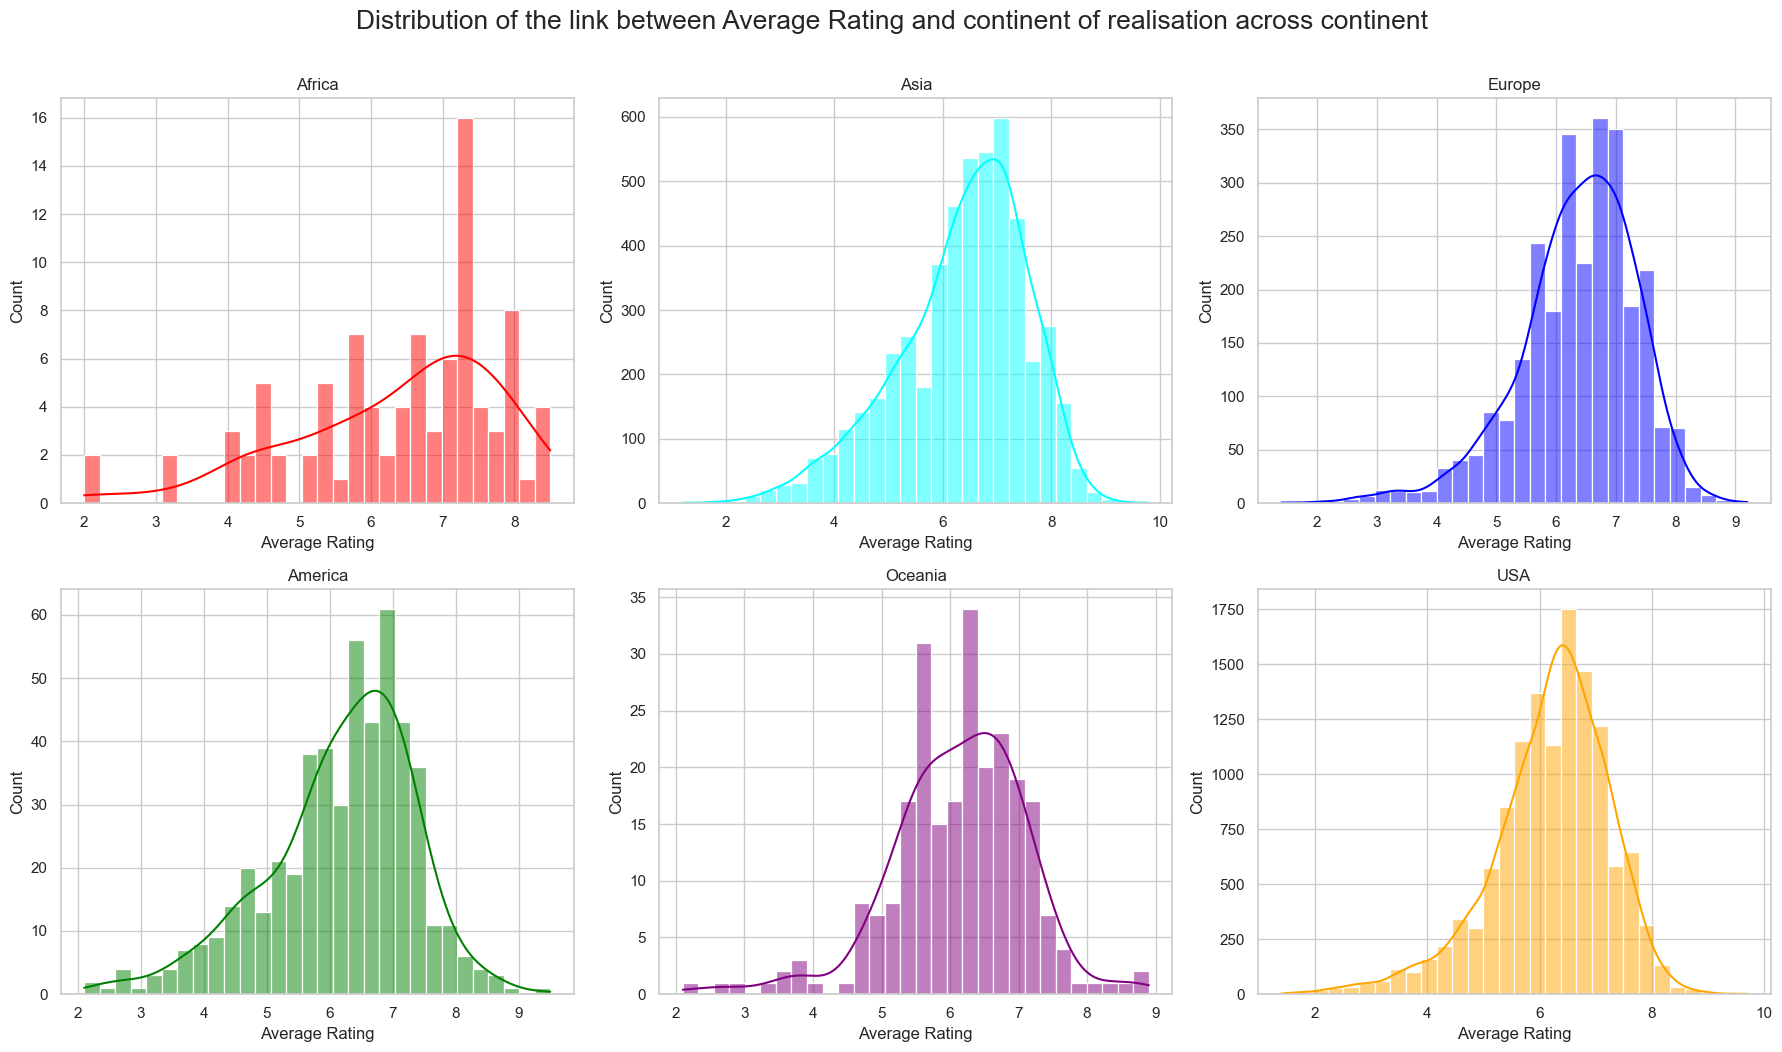

In [ ]:
ig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (18, 10))

sns.histplot(data = df_movie[df_movie.Main_continent == 'Africa'], bins=30, kde=True, x = 'averageRating', ax = axes[0, 0], color='red')
axes[0, 0].set_title('Africa')
axes[0, 0].set_xlabel('Average Rating')
axes[0, 0].set_ylabel('Count')
sns.histplot(data = df_movie[df_movie.Main_continent == 'Asia'], bins=30, kde=True, x = 'averageRating', ax = axes[0, 1], color='cyan')
axes[0, 1].set_title('Asia')
axes[0, 1].set_xlabel('Average Rating')
axes[0, 1].set_ylabel('Count')
sns.histplot(data = df_movie[df_movie.Main_continent == 'Europe'], bins=30, kde=True, x = 'averageRating', ax = axes[0, 2], color = 'blue')
axes[0, 2].set_title('Europe')
axes[0, 2].set_xlabel('Average Rating')
axes[0, 2].set_ylabel('Count')
sns.histplot(data = df_movie[df_movie.Main_continent == 'America'], bins=30, kde=True, x = 'averageRating', ax = axes[1, 0], color = 'green')
axes[1, 0].set_title('America')
axes[1, 0].set_xlabel('Average Rating')
axes[1, 0].set_ylabel('Count')
sns.histplot(data = df_movie[df_movie.Main_continent == 'Oceania'], bins=30, kde=True, x = 'averageRating', ax = axes[1, 1], color = 'purple')
axes[1, 1].set_title('Oceania')
axes[1, 1].set_xlabel('Average Rating')
axes[1, 1].set_ylabel('Count')
sns.histplot(data = df_movie[df_movie.Main_continent == 'USA'], bins=30, kde=True, x = 'averageRating', ax = axes[1, 2], color='orange')
axes[1, 2].set_title('USA')
axes[1, 2].set_xlabel('Average Rating')
axes[1, 2].set_ylabel('Count')

fig.text(0.5,0.95, "Distribution of movie average ratings per continent", fontsize=20, ha="center", va="center")

# Adjust layout
plt.tight_layout()
plt.suptitle("Distribution of the link between Average Rating and continent of realisation across continent", fontsize=19,y=1.05)

# Display the plot
plt.show()

The histograms with kernel density estimate curves display the distribution of average movie ratings by continent. Africa's distribution peaks around a rating of 6, Asia and Europe show a more central peak around 7-8, and Oceania's data has a narrower peak around 6. America and the USA have distributions with higher counts, peaking at around 7 and 6 respectively, with the USA showing a particularly high volume of movies rated between 5 and 7. The varying y-axis scales indicate different counts of movies reviewed per continent.